In [1]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
working_dir = os.getcwd()
print(f"You are now working in {working_dir}")
print("If you need to change to the parent directory, run the cell below")

You are now working in c:\Users\fredd\Desktop\Studier\Project5\flowers\flowers_CNN\jupyter_notebooks
If you need to change to the parent directory, run the cell below


In [3]:
os.chdir(os.path.dirname(working_dir))

In [4]:
working_dir = os.getcwd()
print(f"You have now changed your working directory to {working_dir}")

You have now changed your working directory to c:\Users\fredd\Desktop\Studier\Project5\flowers\flowers_CNN


In [5]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(working_dir) and version in os.listdir(working_dir + '/outputs'):
    print("This version already exists, create a new version if you are working on a new version")
    pass
else:
    os.makedirs(name=file_path)

This version already exists, create a new version if you are working on a new version


In [12]:
image_dirs = 'inputs/dataset/resized_mean_value/flower_photos'
train_path = image_dirs + '/train'
val_path = image_dirs + '/validation'
test_path = image_dirs + '/test'

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_model():
    input_shape = (365, 271, 3)  
    num_classes = 5  

    # Creates a sequential model
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fourth convulation layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout för att förhindra överträning
    model.add(Dense(num_classes, activation='softmax'))  # Softmax för klassificering

    # Compiles the model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Show the model architecture
    model.summary()
    
    return model  # Return the created model

# Create an instance of the model
model = create_model()


C:\Users\fredd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 363, 269, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 181, 134, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 179, 132, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 89, 66, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 87, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 43, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 41, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 20, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 76800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     9,830,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,219,589 (38.98 MB)

 Trainable params: 10,219,589 (38.98 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loads the images
train_generator = train_datagen.flow_from_directory(train_path,  
    target_size=(365, 271),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(val_path,  
    target_size=(365, 271),
    batch_size=32,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(365, 271),
    batch_size=32,
    class_mode='categorical',
)

Found 20549 images belonging to 5 classes.
Found 2934 images belonging to 5 classes.
Found 5877 images belonging to 5 classes.


In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20  
)

C:\Users\fredd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 1480s 2s/step - accuracy: 0.4298 - loss: 1.3415 - val_accuracy: 0.6532 - val_loss: 0.8965
Epoch 2/20
  1/642 ━━━━━━━━━━━━━━━━━━━━ 22:27 2s/step - accuracy: 0.8125 - loss: 0.7854

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 676us/step - accuracy: 0.8125 - loss: 0.7854 - val_accuracy: 0.6364 - val_loss: 0.8363
Epoch 3/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 1464s 2s/step - accuracy: 0.6334 - loss: 0.9502 - val_accuracy: 0.6858 - val_loss: 0.8246
Epoch 4/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 2s 573us/step - accuracy: 0.6562 - loss: 0.8179 - val_accuracy: 0.5909 - val_loss: 1.0684
Epoch 5/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 1467s 2s/step - accuracy: 0.6732 - loss: 0.8509 - val_accuracy: 0.7229 - val_loss: 0.7262
Epoch 6/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 2s 570us/step - accuracy: 0.7500 - loss: 0.9284 - val_accuracy: 0.7727 - val_loss: 0.4518
Epoch 7/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 1466s 2s/step - accuracy: 0.6979 - loss: 0.7879 - val_accuracy: 0.7260 - val_loss: 0.6899
Epoch 8/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 2s 583us/step - accuracy: 0.5938 - loss: 0.9228 - val_accuracy: 0.8182 - val_loss: 0.4667
Epoch 9/20
642/642 ━━━━━━━━━━━━━━━━━━━━ 1463s 2s/step - accuracy: 0.7140 - loss: 0.7469 - val_accurac

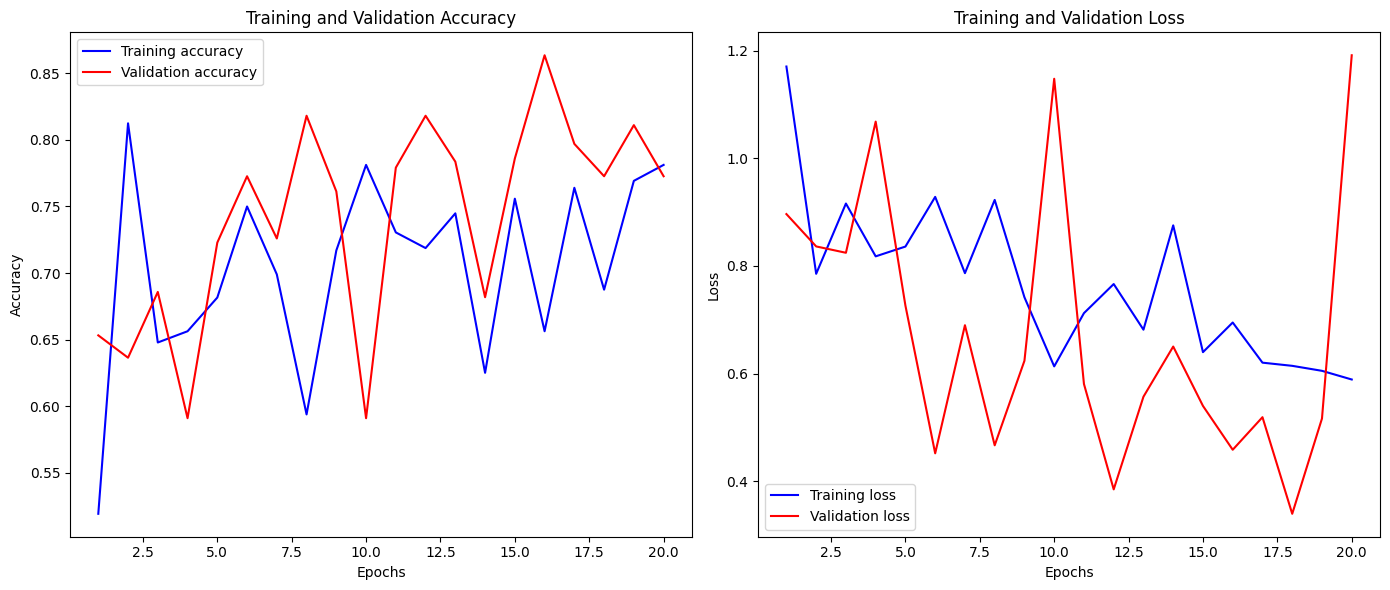

<Figure size 640x480 with 0 Axes>

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

plt.savefig('outputs/v1/mean_value_image_second_model.png')

In [33]:
import json

# Saves training result as json-file
with open('outputs/v1/training_history_mean_value_first_try.json', 'w') as f:
    json.dump(history.history, f)

In [34]:
with open('outputs/v1/training_history_mean_value_first_try.json', 'r') as f:
    loaded_history = json.load(f)